<a href="https://colab.research.google.com/github/physalily/9cc/blob/master/camera_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is input dataset form google drive.
firest code is drive mout code.

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# get host's uptime (in colaboratory limit is 12 hour)
!cat /proc/uptime | awk '{print$1 /60 /60 /24 "days (" $1 "sec)"}'

0.00856505days (740.02sec)


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

TensorFlow 2.x selected.


In [4]:
# import image library
import numpy as np
import pathlib
import os
import tensorflow as tf 
from PIL import Image

%cd /content/drive/My\ Drive/cod_dataset/
path = os.getcwd()
print(path)
print(os.getcwd())
drive_dataset_root = '/content/drive/My Drive/cod_dataset'
print(drive_dataset_root)
with open('/content/drive/My Drive/Code/foo.txt') as fp:
  pass
#image = np.array(Image.open('COD(D)_0001_iphone7_14.jpg'))
data_root = pathlib.Path(drive_dataset_root)

/content/drive/My Drive/cod_dataset
/content/drive/My Drive/cod_dataset
/content/drive/My Drive/cod_dataset
/content/drive/My Drive/cod_dataset


In [5]:
print(data_root.exists())
print(data_root)
for item in data_root.iterdir():
  print(item)

True
/content/drive/My Drive/cod_dataset
/content/drive/My Drive/cod_dataset/COD(D)
/content/drive/My Drive/cod_dataset/dataset_Galaxy
/content/drive/My Drive/cod_dataset/dataset_HUAWEI
/content/drive/My Drive/cod_dataset/dataset_iphone7


In [6]:
import random
all_image_paths = list(data_root.glob('*/*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

603

In [7]:
#list(data_root.glob('*/*/*'))
label_names = sorted(item.name for item in data_root.glob('*/*/') if item.is_dir())
label_names = sorted(set(label_names))
label_to_index = dict((name, index) for index, name in enumerate(label_names))
print(label_names)
print(label_to_index)

# all_image_labels = [label_to_index[pathlib.Path(path)]]
#path
#pathlib.Path(path).name
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]

img_path = all_image_paths[0]
img_path

['0', '2', '4', '6', '8']
{'0': 0, '2': 1, '4': 2, '6': 3, '8': 4}


'/content/drive/My Drive/cod_dataset/dataset_HUAWEI/4/IMG_20190214_113151.jpg'

In [8]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:])

img_tensor = tf.image.decode_jpeg(img_raw)
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.numpy().min())
print(img_final.numpy().max())

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x1c\x0cExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x11\x00\x0b\x00\x02\x00\x00\x00&\x00\x00\x08\xe6\x01\x00\x00\x03\x00\x00\x00\x01\x12\x00\x00\x00\x01\x01\x00\x03\x00\x00\x00\x01\r\x80\x00\x00\x01\x02\x00\x03\x00\x00\x00\x03\x00\x00\t\x0c\x01\x0e\x00\x02\x00\x00\x00\x04dav\x00\x01\x0f\x00\x02\x00\x00\x00\x07\x00\x00\t\x12\x01\x10\x00\x02\x00\x00\x00\t\x00\x00\t\x1a\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\t$\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\t,\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00&\x00\x00\t4\x012\x00\x02\x00\x00\x00\x14\x00\x00\tZ\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\tn\xa4\x0b\x00\x07\x00\x00\x00\x04ipp\x00\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00\xda\x00\x00\x14r\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [9]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

#plt.imshow(load_and_preprocess_image(img_path))
#plt.grid(False)
#plt.xlabel(caption_image(img_path))
#plt.title(label_names[label].title())
print()

path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
#for n,image in enumerate(image_ds.take(4)):
#  plt.subplot(2,2,n+1)
#  plt.imshow(image)
#  plt.grid(False)
#  plt.xticks([])
#  plt.yticks([])
#  plt.xlabel(caption_image(all_image_paths[n]))
#  plt.show()

label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

for label in label_ds.take(10):
  print(label_names[label.numpy()])

image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
print(image_label_ds)

ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
# タプルは展開され、マップ関数の位置引数に割り当てられます
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds


4
2
4
2
8
8
6
6
4
2
<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

<Figure size 576x576 with 0 Axes>

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
import matplotlib.pyplot as plt

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [12]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [16]:
BATCH_SIZE = 20

# シャッフルバッファのサイズをデータセットとおなじに設定することで、データが完全にシャッフルされる
# ようにできます。
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch`を使うことで、モデルの訓練中にバックグラウンドでデータセットがバッチを取得できます。
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

def change_range(image,label):
    return 2*image-1, label

keras_ds = ds.map(change_range)
# シャッフルバッファがいっぱいになるまで、データセットは何秒かかかります。
image_batch,label_batch = next(iter(keras_ds))

feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names))])

logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

len(model.trainable_variables) 
model.summary()

steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

(20, 6, 6, 1280)
min logit: -2.3494225
max logit: 0.9446157

Shape: (20, 5)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


31.0

In [17]:
hist = model.fit(ds, epochs=10, steps_per_epoch=20)

Train for 20 steps
Epoch 1/10
20/20 [==============================] - 8s 413ms/step - loss: 2.5009 - accuracy: 0.2150
Epoch 2/10
20/20 [==============================] - 2s 113ms/step - loss: 1.6094 - accuracy: 0.2250
Epoch 3/10
20/20 [==============================] - 2s 107ms/step - loss: 1.6094 - accuracy: 0.2175
Epoch 4/10
20/20 [==============================] - 2s 111ms/step - loss: 1.6094 - accuracy: 0.1900
Epoch 5/10
20/20 [==============================] - 2s 107ms/step - loss: 1.6094 - accuracy: 0.2075
Epoch 6/10
20/20 [==============================] - 2s 111ms/step - loss: 1.6094 - accuracy: 0.2150
Epoch 7/10
20/20 [==============================] - 2s 113ms/step - loss: 1.6094 - accuracy: 0.1950
Epoch 8/10
20/20 [==============================] - 2s 111ms/step - loss: 1.6094 - accuracy: 0.2200
Epoch 9/10
20/20 [==============================] - 2s 107ms/step - loss: 1.6094 - accuracy: 0.2200
Epoch 10/10
20/20 [==============================] - 2s 111ms/step - loss: 1.6094

[3.9717942237854005, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828, 1.6094379425048828]


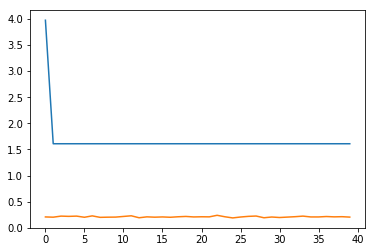

[0.209375, 0.2046875, 0.225, 0.2203125, 0.225, 0.203125, 0.2296875, 0.2015625, 0.2046875, 0.20625, 0.21875, 0.23125, 0.19375, 0.2109375, 0.2046875, 0.209375, 0.203125, 0.2125, 0.21875, 0.209375, 0.2125, 0.2109375, 0.240625, 0.2125, 0.190625, 0.2078125, 0.2203125, 0.2265625, 0.19375, 0.2078125, 0.1984375, 0.20625, 0.2140625, 0.225, 0.209375, 0.209375, 0.2171875, 0.2109375, 0.2140625, 0.20625]


In [15]:
# benchmark

print(hist.history['loss'])

import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.show()
print(hist.history['accuracy'])

# camera_cl end it.
---


# How to use tensorflow.

In [0]:
import tensorflow as tf
import numpy as np

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data *0.1 + 0.3

w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = w * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(201):
  sess.run(train)
  if step % 20 == 0:
    print(step, sess.run(w), sess.run(b))
sess.close()


0 [0.37349832] [0.20997621]
20 [0.16567446] [0.2664557]
40 [0.11702256] [0.29130548]
60 [0.10441218] [0.29774642]
80 [0.10114363] [0.2994159]
100 [0.10029644] [0.29984862]
120 [0.10007683] [0.29996076]
140 [0.10001992] [0.29998985]
160 [0.10000516] [0.2999974]
180 [0.10000134] [0.29999933]
200 [0.10000037] [0.29999983]


In [0]:
%cd "/content/drive/My Drive/cod_dataset/dataset_iphone7/0"
%ls

/content/drive/My Drive/cod_dataset/dataset_iphone7/0
'COD(D)_0001_iphone7_14.jpg'  'COD(D)_0010_iphone7_3.jpg'
'COD(D)_0002_iphone7_14.jpg'  'COD(D)_0011_iphone7_3.jpg'
'COD(D)_0002_iphone7_3.jpg'   'COD(D)_0011_iphone7_7.jpg'
'COD(D)_0003_iphone7_14.jpg'  'COD(D)_0012_iphone7_14.jpg'
'COD(D)_0003_iphone7_3.jpg'   'COD(D)_0012_iphone7_3.jpg'
'COD(D)_0003_iphone7_7.jpg'   'COD(D)_0012_iphone7_7.jpg'
'COD(D)_0004_iphone7_3.jpg'   'COD(D)_0013_iphone7_3.jpg'
'COD(D)_0004_iphone7_7.jpg'   'COD(D)_0013_iphone7_7.jpg'
'COD(D)_0005_iphone7_14.jpg'  'COD(D)_0014_iphone7_3.jpg'
'COD(D)_0005_iphone7_3.jpg'   'COD(D)_0015_iphone7_3.jpg'
'COD(D)_0005_iphone7_7.jpg'   'COD(D)_0015_iphone7_7.jpg'
'COD(D)_0006_iphone7_14.jpg'  'COD(D)_0016_iphone7_14.jpg'
'COD(D)_0006_iphone7_3.jpg'   'COD(D)_0016_iphone7_3.jpg'
'COD(D)_0006_iphone7_7.jpg'   'COD(D)_0016_iphone7_7.jpg'
'COD(D)_0007_iphone7_14.jpg'  'COD(D)_0017_iphone7_14.jpg'
'COD(D)_0007_iphone7_3.jpg'   'COD(D)_0017_iphone7_3.jpg'
'COD(D)_0007_ip

In [0]:
%cd "/content/drive/My Drive/"
with open('foo.txt', 'w') as fp:
  fp.write("Hello  google colaraboratory!!")
%cat foo.txt
%ls cod_dataset/dataset_Galaxy/0/

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname = 'flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

/content/drive/My Drive
Hello  google colaraboratory!!IMG_20190214_094343.jpg  IMG_20190214_095612.jpg  IMG_20190214_100311.jpg
IMG_20190214_094415.jpg  IMG_20190214_095708.jpg  IMG_20190214_100402.jpg
IMG_20190214_094519.jpg  IMG_20190214_095935.jpg  IMG_20190214_100443.jpg
IMG_20190214_095250.jpg  IMG_20190214_100030.jpg  IMG_20190214_100644.jpg
IMG_20190214_095350.jpg  IMG_20190214_100139.jpg  IMG_20190214_100839.jpg
TensorFlow is already loaded. Please restart the runtime to change versions.
228818944/228813984 [==============================] - 2s 0us/step
/root/.keras/datasets/flower_photos


In [0]:
import random 
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count


3670

In [0]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [0]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [4, 2, 4, 0, 2, 2, 2, 4, 2, 3]


In [0]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

NameError: ignored

In [0]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0 # normalize to [0,1] range

  return image

In [0]:
import os 
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [0]:
import IPython.display as display
def caption_image(image_path):
  image_rel = pathlib.Path(image_path).relative_to(data_root)
  return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

In [0]:
import matplotlib.pyplot as plt

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [0]:
print(path_ds)

In [0]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [0]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [0]:
print(image_label_ds)

In [0]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

In [0]:
BATCH_SIZE = 32

ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)

ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

In [0]:
ds = image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count)
)
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

In [0]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

In [0]:
def change_range(image, label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

In [0]:
image_batch, label_batch = next(iter(keras_ds))

In [0]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

In [0]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names))])

logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()
print("Shape:", logit_batch.shape)

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [0]:
len(model.trainable_variables)

In [0]:
model.summary()

In [0]:
steps_per_epoch = tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

In [0]:
model.fit(ds, epochs=1, steps_per_epoch=3)

In [0]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()

  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images, labels) in enumerate(it):
    if i%10 == 0:
      print('.', end='')

  print()
  end = time.time()

  duration = end_start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  print("Total time: {}s".format(end-overall_start))

              total        used        free      shared  buff/cache   available
Mem:            12G        2.1G        6.8G        5.9M        3.8G         11G
Swap:            0B          0B          0B
